In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn import preprocessing
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import string

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelSpreading

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
df_lyrics = pd.read_csv("rap_song_analyis.csv")
df_spotify = pd.read_csv("rap_oy_spotify.csv")
df_search = pd.read_csv("rap_oy_search_trends.csv")
df_bb = pd.read_csv("rap_oy_billboard_features.csv")

In [ ]:
print("Len of spotify data = ", len(df_spotify))
print("Len of billboard data = ", len(df_bb))
print("Len of lyrics data = ", len(df_lyrics))
print("Len of search trends data = ", len(df_search))

Len of spotify data =  103
Len of billboard data =  103
Len of lyrics data =  103
Len of search trends data =  97


In [ ]:
df_bb

,Unnamed: 0,year,award category,song,artist,wasWinner,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position
0,0,2004,Song of the Year,Lose Yourself,Eminem,yes,19,16,23,1,10.57
1,1,2004,Song of the Year,Beautiful,Snoop Dogg and Pharrell,no,27,16,31,2,13.48
2,2,2004,Song of the Year,Excuse Me Miss,Jay-Z and Pharrell,no,12,3,19,8,34.00
3,3,2004,Song of the Year,In da Club,50 Cent,no,23,17,30,1,15.10
4,4,2004,Song of the Year,Work It,Missy Elliott,no,20,16,22,2,8.77
...,...,...,...,...,...,...,...,...,...,...,...
98,98,2023,Song of the Year,Churchill Downs,Jack Harlow featuring Drake,no,1,0,2,23,50.50
99,99,2023,Song of the Year,God Did,DJ Khaled featuring Rick Ross,no,1,0,3,17,47.67
100,100,2023,Song of the Year,The Heart Part 5,Kendrick Lamar,no,2,0,4,15,46.00
101,101,2023,Song of the Year,Pushin P,Gunna and Future featuring Young Thug,no,13,5,20,7,32.35


In [ ]:
list1 = list(df_spotify["song"])
list2 = list(df_bb["song"])
list3 = list(df_lyrics["song"])
list4 = list(df_search["song"])

In [ ]:
# list11 = list(df_spotify["artist"])
# list22 = list(df_bb["artist"])
# list33 = list(df_lyrics["artist"])
# list44 = list(df_search["artist"])

# list11 = [s.lstrip() for s in list11]
# list22 = [s.lstrip() for s in list22]
# list33 = [s.lstrip() for s in list33]
# list44 = [s.lstrip() for s in list44]

# list11 = [s.split()[0] for s in list11]
# list22 = [s.split()[0] for s in list22]
# list33 = [s.split()[0] for s in list33]
# list44 = [s.split()[0] for s in list44]

# key1 = [list1[i] + list11[i] for i in range(len(list1))]
# key2 = [list2[i] + list22[i] for i in range(len(list2))]
# key3 = [list3[i] + list33[i] for i in range(len(list3))]
# key4 = [list4[i] + list44[i] for i in range(len(list4))]

key1 = [list1[i] for i in range(len(list1))]
key2 = [list2[i] for i in range(len(list2))]
key3 = [list3[i] for i in range(len(list3))]
key4 = [list4[i] for i in range(len(list4))]

key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key1]
key2 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key2]
key3 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key3]
key4 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in key4]

In [ ]:
df_spotify["song_key"] = key1
df_bb["song_key"] = key2
df_lyrics["song_key"] = key3
df_search["song_key"] = key4

In [ ]:
# Merge the dataframes on the common column 'song_key'
merged_df = pd.merge(df_bb, df_spotify, on='song_key', how='inner')
merged_df = pd.merge(merged_df, df_lyrics, on='song_key', how='inner')
# merged_df = pd.merge(merged_df,df_search, on='song_key', how='inner')

# Only keep rows that have information from all 3 dataframes
result_df = merged_df.dropna()

In [ ]:
result_df = result_df[['year_x', 'song_x', 'artist_x',
       'wasWinner_x', 'weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity']]

In [ ]:
# Remove duplicate rows based on all columns
result_df = result_df.reset_index(drop=True).drop_duplicates()

In [ ]:
print("Len of combined data = ", len(result_df))

Len of combined data =  101


In [ ]:
# Remove duplicate rows based on all columns
result_df = result_df.reset_index(drop=True).drop_duplicates(subset=['weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity'])

In [ ]:
result_df.keys()

Index(['year_x', 'song_x', 'artist_x', 'wasWinner_x', 'weeks_in_top_25',
       'weeks_in_top_10', 'weeks_on_chart', 'peak_position',
       'average_position', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'num_words',
       'vocab_diveristy', 'pos_sen', 'neg_sen', 'happy', 'fear', 'anger',
       'sad', 'surprise', 'profanity', 'class'],
      dtype='object')

In [ ]:
result_df.to_csv("rap_combined_not_full.csv")

In [ ]:
# Splitting into features and target

feature_list = ['weeks_in_top_25', 'weeks_in_top_10', 'weeks_on_chart',
       'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy',
       'pos_sen', 'neg_sen', 'happy', 'fear', 'anger', 'sad', 'surprise',
       'profanity']

result_df['class'] = result_df['wasWinner_x'].replace({'yes': 1, 'no': 0})

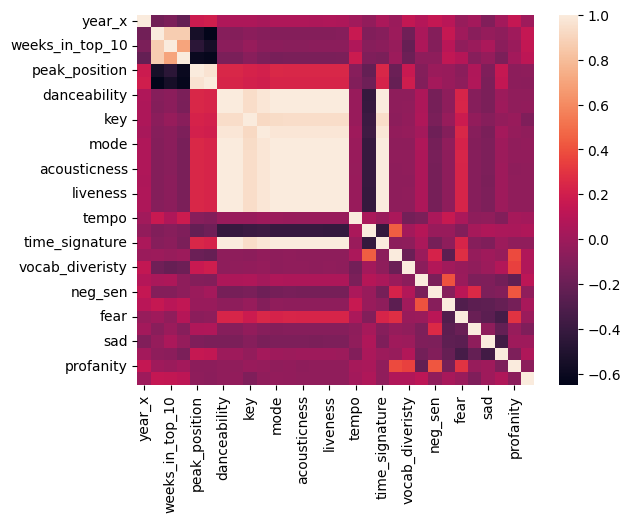

<Figure size 1500x1500 with 0 Axes>

In [ ]:
sns.heatmap(result_df.corr())
plt.figure(figsize=(15, 15))
plt.show()

In [ ]:
(result_df.corr().unstack().sort_values().drop_duplicates())[0:15]

weeks_in_top_25   average_position   -0.65
average_position  weeks_on_chart     -0.63
weeks_on_chart    peak_position      -0.61
weeks_in_top_10   average_position   -0.56
weeks_in_top_25   peak_position      -0.55
peak_position     weeks_in_top_10    -0.46
time_signature    duration_ms        -0.42
duration_ms       danceability       -0.41
                  valence            -0.41
liveness          duration_ms        -0.41
speechiness       duration_ms        -0.41
duration_ms       acousticness       -0.41
                  instrumentalness   -0.41
energy            duration_ms        -0.41
duration_ms       mode               -0.41
dtype: float64

In [ ]:
(result_df.corr().unstack().sort_values().drop_duplicates())[-60:]

weeks_on_chart    weeks_in_top_10    0.70
                  weeks_in_top_25    0.87
weeks_in_top_25   weeks_in_top_10    0.87
key               loudness           0.92
mode              key                0.93
key               instrumentalness   0.94
speechiness       key                0.94
danceability      key                0.94
liveness          key                0.94
time_signature    key                0.94
energy            key                0.94
valence           key                0.94
acousticness      key                0.94
average_position  peak_position      0.96
loudness          time_signature     0.98
mode              loudness           0.98
danceability      loudness           0.98
loudness          instrumentalness   0.98
                  liveness           0.98
                  valence            0.98
speechiness       loudness           0.98
loudness          acousticness       0.98
energy            loudness           0.98
time_signature    mode            

In [ ]:
result_df.corr()

,year_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,energy,key,loudness,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
year_x,1.00,-0.17,-0.13,-0.22,0.18,0.20,0.06,0.06,0.06,0.04,...,0.14,0.08,0.15,0.10,-0.03,0.02,-0.11,0.02,0.15,-0.00
weeks_in_top_25,-0.17,1.00,0.87,0.87,-0.55,-0.65,-0.09,-0.10,-0.07,-0.09,...,-0.18,0.04,-0.10,0.16,0.01,-0.08,-0.04,-0.06,0.00,0.14
weeks_in_top_10,-0.13,0.87,1.00,0.70,-0.46,-0.56,-0.07,-0.08,-0.03,-0.07,...,-0.21,0.06,-0.10,0.10,-0.06,-0.02,0.05,-0.07,-0.01,0.14
weeks_on_chart,-0.22,0.87,0.70,1.00,-0.61,-0.63,-0.13,-0.14,-0.08,-0.12,...,-0.19,-0.06,-0.06,0.14,0.09,-0.09,-0.03,-0.13,0.02,0.12
peak_position,0.18,-0.55,-0.46,-0.61,1.00,0.96,0.25,0.25,0.22,0.21,...,0.17,-0.10,-0.02,-0.02,-0.07,0.06,-0.12,0.15,-0.07,-0.06
average_position,0.20,-0.65,-0.56,-0.63,0.96,1.00,0.23,0.23,0.21,0.20,...,0.19,-0.11,0.02,-0.02,-0.06,0.07,-0.13,0.14,-0.07,-0.07
danceability,0.06,-0.09,-0.07,-0.13,0.25,0.23,1.00,1.00,0.94,0.98,...,-0.06,0.06,-0.15,-0.06,0.23,-0.09,-0.13,-0.01,-0.05,-0.05
energy,0.06,-0.10,-0.08,-0.14,0.25,0.23,1.00,1.00,0.94,0.98,...,-0.06,0.06,-0.15,-0.06,0.23,-0.09,-0.13,-0.00,-0.05,-0.05
key,0.06,-0.07,-0.03,-0.08,0.22,0.21,0.94,0.94,1.00,0.92,...,-0.05,0.06,-0.14,-0.03,0.18,-0.04,-0.09,-0.04,-0.02,-0.12
loudness,0.04,-0.09,-0.07,-0.12,0.21,0.20,0.98,0.98,0.92,1.00,...,-0.04,0.02,-0.18,-0.10,0.24,-0.08,-0.14,0.02,-0.03,-0.05


In [ ]:
feature_variance = {}
for feature in feature_list:
    values = np.array(result_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sortedx = []
for var in sorted_variance:
  print(var)
  features_sortedx.append(var[0])

('loudness', 0.00846953856975993)
('time_signature', 0.00939414049586777)
('energy', 0.009796407988818858)
('mode', 0.009811370830289745)
('valence', 0.009821089490148814)
('danceability', 0.009842259666214836)
('speechiness', 0.009869134327241496)
('liveness', 0.009870246852791455)
('acousticness', 0.00987634020683224)
('instrumentalness', 0.009897865162751573)
('key', 0.010189919649379105)
('duration_ms', 0.014009249942909873)
('anger', 0.017585893491124258)
('surprise', 0.02062677122769065)
('vocab_diveristy', 0.026280208706098)
('num_words', 0.029771441640162783)
('neg_sen', 0.03453313042981252)
('happy', 0.04206518333926664)
('fear', 0.04695854545454546)
('sad', 0.048330653894210734)
('pos_sen', 0.04960195971634842)
('tempo', 0.05404197015842072)
('weeks_on_chart', 0.05800347222222222)
('weeks_in_top_10', 0.08155310650887575)
('average_position', 0.08954117705318801)
('weeks_in_top_25', 0.09304794921874997)
('peak_position', 0.10486790685104273)
('profanity', 0.11381560085208607)


In [ ]:
def lazy_predict(result_df, feature_list, norm=False, print=False):
  X = result_df[feature_list]
  y = result_df["class"]

  if norm == True:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

  clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  if print == True:
    print(models)
  return models

In [ ]:
for i in range(15):
  models = lazy_predict(result_df, features_sortedx[i:], norm=True)
  print("Removing", i, "features", "F1 Score is", models.iloc[0][3])

100%|██████████| 29/29 [00:01<00:00, 19.27it/s]


Removing 0 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 20.92it/s]


Removing 1 features F1 Score is 0.5045454545454545


100%|██████████| 29/29 [00:01<00:00, 28.79it/s]


Removing 2 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 28.81it/s]


Removing 3 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 28.75it/s]


Removing 4 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 24.59it/s]


Removing 5 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 14.71it/s]


Removing 6 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 27.70it/s]


Removing 7 features F1 Score is 0.56


100%|██████████| 29/29 [00:00<00:00, 30.62it/s]


Removing 8 features F1 Score is 0.6475279106858054


100%|██████████| 29/29 [00:00<00:00, 30.67it/s]


Removing 9 features F1 Score is 0.5291101055806938


100%|██████████| 29/29 [00:00<00:00, 29.85it/s]


Removing 10 features F1 Score is 0.5888888888888888


100%|██████████| 29/29 [00:00<00:00, 29.70it/s]


Removing 11 features F1 Score is 0.5888888888888888


100%|██████████| 29/29 [00:00<00:00, 29.62it/s]


Removing 12 features F1 Score is 0.56


100%|██████████| 29/29 [00:01<00:00, 28.93it/s]


Removing 13 features F1 Score is 0.56


100%|██████████| 29/29 [00:02<00:00, 13.35it/s]

Removing 14 features F1 Score is 0.5045454545454545


In [ ]:
models = lazy_predict(result_df, features_sortedx[9:], norm=True)

100%|██████████| 29/29 [00:02<00:00, 10.31it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.53,0.53,0.53,0.53,0.03
AdaBoostClassifier,0.53,0.51,0.51,0.46,0.38
XGBClassifier,0.53,0.51,0.51,0.46,0.14
LGBMClassifier,0.53,0.51,0.51,0.46,0.10
CalibratedClassifierCV,0.53,0.50,0.50,0.37,0.16
LogisticRegression,0.53,0.50,0.50,0.37,0.04
BernoulliNB,0.53,0.50,0.50,0.37,0.05
SVC,0.53,0.50,0.50,0.37,0.06
RidgeClassifierCV,0.53,0.50,0.50,0.37,0.07


In [ ]:
def evaluate_three_years(clf, result_df, feature_list, starting_year, norm=False):

  if norm == True:
    # Select only the numeric columns for scaling
    num_cols = result_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'class']).columns
    scaler = StandardScaler()
    scaler.fit(result_df[num_cols])
    result_df[num_cols] = scaler.transform(result_df[num_cols])

  df_train = result_df[(result_df['year_x'] >= starting_year) & (result_df['year_x'] <= 2020)]
  df_2021 = result_df[(result_df['year_x'] == 2021)]
  df_2022 = result_df[(result_df['year_x'] == 2022)]
  df_2023 = result_df[(result_df['year_x'] == 2023)]

  X_train = df_train[feature_list]
  y_train = df_train["class"]

  X_train = StandardScaler().fit_transform(X_train)

  X_2021 = df_2021[feature_list]
  X_2021 = StandardScaler().fit_transform(X_2021)
  y_2021 = df_2021["class"]

  X_2022 = df_2022[feature_list]
  X_2022 = StandardScaler().fit_transform(X_2022)
  y_2022 = df_2022["class"]

  X_2023 = df_2023[feature_list]
  X_2023 = StandardScaler().fit_transform(X_2023)
  y_2023 = df_2023["class"]

  clf.fit(X_train, y_train)

  overall_preds = []
  actuals = []


  print("2021 PREDICTIONS")

  proba = clf.predict_proba(X_2021)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2021.iloc[ind]["song_x"])
      overall_preds.append(df_2021.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2022 PREDICTIONS")

  proba = clf.predict_proba(X_2022)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2022.iloc[ind]["song_x"])
      overall_preds.append(df_2022.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2023 PREDICTIONS")

  proba = clf.predict_proba(X_2023)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2023.iloc[ind]["song_x"])
      overall_preds.append(df_2023.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])


  correct = 0
  for song in actuals:
    if song in overall_preds:
      correct += 1

  print("")
  print("Got", correct, "correct")
  print("")

  print("Feature Importances: ")
  feature_imps = {}
  for i in range(len(feature_list)):
    feature_imps[feature_list[i]] = clf.feature_importances_[i]
  feature_imps = sorted(feature_imps.items(), key=lambda x:x[1],reverse=True)
  print(feature_imps)
  print("")

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years(clf, result_df, features_sortedx[9:], 2004, norm=True)

2021 PREDICTIONS
Top 3 predictions:
Savage
The Bigger Picture
The Box

Actual winner: 
Savage

------------------------
2022 PREDICTIONS
Top 3 predictions:
Jail
Best Friend
My Life

Actual winner: 
Jail

------------------------
2023 PREDICTIONS
Top 3 predictions:
The Heart Part 5
Pushin P
Wait for U

Actual winner: 
The Heart Part 5

Got 3 correct



In [ ]:
evaluate_three_years(clf, result_df, features_sortedx[9:], 2004, norm=True)

2021 PREDICTIONS
Top 3 predictions:
Savage
The Bigger Picture
The Box

Actual winner: 
Savage

------------------------
2022 PREDICTIONS
Top 3 predictions:
Jail
Best Friend
My Life

Actual winner: 
Jail

------------------------
2023 PREDICTIONS
Top 3 predictions:
The Heart Part 5
Pushin P
Wait for U

Actual winner: 
The Heart Part 5

Got 3 correct

Feature Importances: 
[('neg_sen', 0.12), ('vocab_diveristy', 0.1), ('num_words', 0.1), ('happy', 0.1), ('key', 0.08), ('fear', 0.08), ('sad', 0.06), ('weeks_in_top_10', 0.06), ('average_position', 0.06), ('profanity', 0.06), ('anger', 0.04), ('surprise', 0.04), ('instrumentalness', 0.02), ('duration_ms', 0.02), ('pos_sen', 0.02), ('tempo', 0.02), ('peak_position', 0.02), ('weeks_on_chart', 0.0), ('weeks_in_top_25', 0.0)]



Including search trends

In [ ]:
list1 = list(result_df["song_x"])
key1 = [i.translate(str.maketrans('', '', string.punctuation)).lower() for i in list1]
result_df["song_key"] = key1

In [ ]:
# Merge the dataframes on the common column 'song_key'
combined_df = pd.merge(df_search, result_df, on='song_key', how='inner')

In [ ]:
len(combined_df)

88

In [ ]:
combined_df

,Unnamed: 0,song,year,peak pop,avg pop,song_key,year_x,song_x,artist_x,wasWinner_x,...,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity,class
0,0,Lose Yourself,2005,69.00,40.85,lose yourself,2004,Lose Yourself,Eminem,yes,...,1.22,-0.02,-0.06,0.15,0.63,-0.22,0.41,-1.02,-0.65,1
1,1,Beautiful,2005,10.00,1.18,beautiful,2004,Beautiful,Snoop Dogg and Pharrell,no,...,-0.42,3.00,-1.14,3.56,-1.38,-0.68,-0.61,-0.78,-1.80,0
2,2,Excuse Me Miss,2005,16.00,1.36,excuse me miss,2004,Excuse Me Miss,Jay-Z and Pharrell,no,...,-0.28,-0.81,-1.05,-0.67,-0.96,-0.33,2.27,-0.21,0.73,0
3,3,In da Club,2005,100.00,58.51,in da club,2004,In da Club,50 Cent,no,...,-0.46,-0.29,-0.14,1.17,-0.12,0.83,-0.33,-1.18,0.77,0
4,4,Work It,2005,9.00,1.15,work it,2004,Work It,Missy Elliott,no,...,-0.32,-0.04,-0.94,-0.77,0.80,0.60,0.04,-0.54,0.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,92,Jail,2023,100.00,87.40,jail,2022,Jail,Kanye West featuring Jay-Z,yes,...,-0.42,3.00,-1.14,3.56,-1.38,-0.68,-0.61,-0.78,-1.80,1
84,93,Bath Salts,2023,1.00,1.00,bath salts,2022,Bath Salts,DMX featuring Jay-Z and Nas,no,...,3.59,0.20,0.17,-0.21,-0.71,0.02,-0.61,1.41,0.65,0
85,94,Best Friend,2023,0.50,0.50,best friend,2022,Best Friend,Saweetie featuring Doja Cat,no,...,0.61,1.05,0.57,1.72,0.21,-0.33,-1.82,0.03,0.77,0
86,95,Family Ties,2023,2.00,1.02,family ties,2022,Family Ties,Baby Keem featuring Kendrick Lamar,no,...,0.91,-0.29,0.39,-0.31,-0.21,0.36,-1.08,1.25,0.77,0


In [ ]:
features_list = ['peak pop', 'avg pop', 'song_key', 'weeks_in_top_25', 'weeks_in_top_10',
       'weeks_on_chart', 'peak_position', 'average_position', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'num_words', 'vocab_diveristy', 'pos_sen', 'neg_sen',
       'happy', 'fear', 'anger', 'sad', 'surprise', 'profanity', 'class']

In [ ]:
feature_variance = {}
for feature in feature_list:
    values = np.array(result_df[feature])
    x_norm = (values-np.min(values))/(np.max(values)-np.min(values))
    var = np.var(x_norm)
    #print("Variance for", feature, "=", var)
    feature_variance[feature] = var

In [ ]:
sorted_variance = sorted(feature_variance.items(), key=lambda x:x[1])
features_sorted = []
for var in sorted_variance:
  print(var)
  features_sorted.append(var[0])

('loudness', 0.00846953856975993)
('time_signature', 0.00939414049586777)
('energy', 0.009796407988818858)
('mode', 0.009811370830289745)
('valence', 0.009821089490148814)
('danceability', 0.009842259666214836)
('speechiness', 0.009869134327241496)
('liveness', 0.009870246852791455)
('acousticness', 0.00987634020683224)
('instrumentalness', 0.009897865162751573)
('key', 0.010189919649379105)
('duration_ms', 0.014009249942909873)
('anger', 0.017585893491124258)
('surprise', 0.02062677122769065)
('vocab_diveristy', 0.026280208706098)
('num_words', 0.029771441640162783)
('neg_sen', 0.03453313042981252)
('happy', 0.04206518333926664)
('fear', 0.04695854545454546)
('sad', 0.048330653894210734)
('pos_sen', 0.04960195971634842)
('tempo', 0.05404197015842072)
('weeks_on_chart', 0.05800347222222222)
('weeks_in_top_10', 0.08155310650887575)
('average_position', 0.08954117705318801)
('weeks_in_top_25', 0.09304794921874997)
('peak_position', 0.10486790685104273)
('profanity', 0.11381560085208607)


In [ ]:
for i in range(10):
  models = lazy_predict(combined_df, features_sorted[i:], norm=True)
  print("Removing", i, "features", "F1 Score is", models.iloc[0][3])

100%|██████████| 29/29 [00:03<00:00,  8.54it/s]


Removing 0 features F1 Score is 0.7142857142857143


100%|██████████| 29/29 [00:01<00:00, 21.76it/s]


Removing 1 features F1 Score is 0.7551020408163265


100%|██████████| 29/29 [00:01<00:00, 28.87it/s]


Removing 2 features F1 Score is 0.7551020408163265


100%|██████████| 29/29 [00:00<00:00, 30.02it/s]


Removing 3 features F1 Score is 0.7142857142857143


100%|██████████| 29/29 [00:00<00:00, 29.02it/s]


Removing 4 features F1 Score is 0.6928571428571428


100%|██████████| 29/29 [00:01<00:00, 28.46it/s]


Removing 5 features F1 Score is 0.7551020408163265


100%|██████████| 29/29 [00:01<00:00, 28.34it/s]


Removing 6 features F1 Score is 0.7551020408163265


100%|██████████| 29/29 [00:00<00:00, 29.51it/s]


Removing 7 features F1 Score is 0.7794486215538846


100%|██████████| 29/29 [00:00<00:00, 29.54it/s]


Removing 8 features F1 Score is 0.7551020408163265


100%|██████████| 29/29 [00:00<00:00, 29.52it/s]

Removing 9 features F1 Score is 0.7551020408163265


In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years(clf, combined_df, features_sorted[0:], 2005, norm=True)

ValueError: ignored

SMOTE

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def lazy_predict_smote(result_df, feature_list, norm=False, print=False):
  X = result_df[feature_list]
  y = result_df["class"]

  # transform the dataset
  over = SMOTE(sampling_strategy=0.4)
  steps = [('over', over)]
  pipeline = Pipeline(steps=steps)
  X, y = pipeline.fit_resample(X, y)

  if norm == True:
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=42)

  clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  if print == True:
    print(models)
  return models

In [ ]:
for i in range(15):
  models = lazy_predict_smote(combined_df, features_sorted[i:], norm=True)
  print("Removing", i, "features", "F1 Score is", models.iloc[0][3])

100%|██████████| 29/29 [00:01<00:00, 28.87it/s]


Removing 0 features F1 Score is 0.856060606060606


100%|██████████| 29/29 [00:01<00:00, 28.39it/s]


Removing 1 features F1 Score is 0.9312169312169313


100%|██████████| 29/29 [00:01<00:00, 28.98it/s]


Removing 2 features F1 Score is 0.856060606060606


100%|██████████| 29/29 [00:01<00:00, 28.30it/s]


Removing 3 features F1 Score is 1.0


100%|██████████| 29/29 [00:01<00:00, 28.53it/s]


Removing 4 features F1 Score is 0.8666666666666667


100%|██████████| 29/29 [00:01<00:00, 28.64it/s]


Removing 5 features F1 Score is 0.8054298642533937


100%|██████████| 29/29 [00:01<00:00, 28.20it/s]


Removing 6 features F1 Score is 0.8666666666666667


100%|██████████| 29/29 [00:01<00:00, 28.15it/s]


Removing 7 features F1 Score is 0.856060606060606


100%|██████████| 29/29 [00:00<00:00, 29.95it/s]


Removing 8 features F1 Score is 0.8666666666666667


100%|██████████| 29/29 [00:02<00:00, 11.35it/s]


Removing 9 features F1 Score is 0.7936507936507937


100%|██████████| 29/29 [00:01<00:00, 27.66it/s]


Removing 10 features F1 Score is 0.856060606060606


100%|██████████| 29/29 [00:00<00:00, 29.42it/s]


Removing 11 features F1 Score is 0.8703703703703703


100%|██████████| 29/29 [00:00<00:00, 29.78it/s]


Removing 12 features F1 Score is 0.7407407407407407


100%|██████████| 29/29 [00:00<00:00, 29.62it/s]


Removing 13 features F1 Score is 0.8666666666666667


100%|██████████| 29/29 [00:01<00:00, 28.55it/s]

Removing 14 features F1 Score is 0.8666666666666667


In [ ]:
models = lazy_predict_smote(combined_df, features_sorted[2:], norm=True)

100%|██████████| 29/29 [00:03<00:00,  7.56it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.87,0.90,0.90,0.87,0.06
ExtraTreesClassifier,0.93,0.90,0.90,0.93,0.38
LabelPropagation,0.87,0.90,0.90,0.87,0.08
LabelSpreading,0.87,0.90,0.90,0.87,0.07
AdaBoostClassifier,0.80,0.80,0.80,0.80,0.25
RandomForestClassifier,0.87,0.80,0.80,0.86,0.72
BaggingClassifier,0.87,0.80,0.80,0.86,0.12
LinearDiscriminantAnalysis,0.73,0.75,0.75,0.74,0.05
XGBClassifier,0.80,0.70,0.70,0.77,0.83


In [ ]:
def evaluate_three_years_smote(clf, result_df, feature_list, starting_year, norm=False):

  if norm == True:
    # Select only the numeric columns for scaling
    num_cols = result_df.select_dtypes(include=['float', 'int']).drop(columns=['year_x', 'class']).columns
    scaler = StandardScaler()
    scaler.fit(result_df[num_cols])
    result_df[num_cols] = scaler.transform(result_df[num_cols])

  df_train = result_df[(result_df['year_x'] >= starting_year) & (result_df['year_x'] <= 2020)]
  df_2021 = result_df[(result_df['year_x'] == 2021)]
  df_2022 = result_df[(result_df['year_x'] == 2022)]
  df_2023 = result_df[(result_df['year_x'] == 2023)]

  X_train = df_train[feature_list]
  y_train = df_train["class"]

  # transform the dataset
  oversample = RandomOverSampler(sampling_strategy=0.25)
  X_train, y_train = oversample.fit_resample(X_train, y_train)

  X_train = StandardScaler().fit_transform(X_train)

  X_2021 = df_2021[feature_list]
  X_2021 = StandardScaler().fit_transform(X_2021)
  y_2021 = df_2021["class"]

  X_2022 = df_2022[feature_list]
  X_2022 = StandardScaler().fit_transform(X_2022)
  y_2022 = df_2022["class"]

  X_2023 = df_2023[feature_list]
  X_2023 = StandardScaler().fit_transform(X_2023)
  y_2023 = df_2023["class"]

  clf.fit(X_train, y_train)

  overall_preds = []
  actuals = []


  print("2021 PREDICTIONS")

  proba = clf.predict_proba(X_2021)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2021.iloc[ind]["song_x"])
      overall_preds.append(df_2021.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2021.loc[df_2021['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2022 PREDICTIONS")

  proba = clf.predict_proba(X_2022)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2022.iloc[ind]["song_x"])
      overall_preds.append(df_2022.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2022.loc[df_2022['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])

  print("")
  print("------------------------")
  print("2023 PREDICTIONS")

  proba = clf.predict_proba(X_2023)
  proba_win = proba[:, 1]
  top_3_ind = np.argpartition(proba_win, -3)[-3:]

  print("Top 3 predictions:")
  for ind in top_3_ind:
      print(df_2023.iloc[ind]["song_x"])
      overall_preds.append(df_2023.iloc[ind]["song_x"])
  print("")
  print("Actual winner: ")
  temp = df_2023.loc[df_2023['wasWinner_x'] == 'yes']
  print(temp.iloc[0]["song_x"])
  actuals.append(temp.iloc[0]["song_x"])


  correct = 0
  for song in actuals:
    if song in overall_preds:
      correct += 1

  print("")
  print("Got", correct, "correct")
  print("")

In [ ]:
from sklearn.semi_supervised import LabelPropagation

In [ ]:
clf = AdaBoostClassifier()

In [ ]:
evaluate_three_years_smote(clf, combined_df, features_sorted[2:], 2005, norm=True)

ValueError: ignored

In [ ]:
df_x = pd.read_csv("rap_combined_not_full.csv")

In [ ]:
df_x.corr()

,Unnamed: 0,year_x,weeks_in_top_25,weeks_in_top_10,weeks_on_chart,peak_position,average_position,danceability,energy,key,...,num_words,vocab_diveristy,pos_sen,neg_sen,happy,fear,anger,sad,surprise,profanity
Unnamed: 0,1.00,1.00,-0.17,-0.13,-0.22,0.18,0.20,0.07,0.06,0.06,...,-0.02,0.14,0.07,0.14,0.10,-0.03,0.02,-0.11,0.02,0.15
year_x,1.00,1.00,-0.17,-0.13,-0.22,0.18,0.20,0.06,0.06,0.06,...,-0.01,0.14,0.08,0.15,0.10,-0.03,0.02,-0.11,0.02,0.15
weeks_in_top_25,-0.17,-0.17,1.00,0.87,0.87,-0.55,-0.65,-0.09,-0.10,-0.07,...,-0.01,-0.18,0.04,-0.10,0.16,0.01,-0.08,-0.04,-0.06,0.00
weeks_in_top_10,-0.13,-0.13,0.87,1.00,0.70,-0.46,-0.56,-0.07,-0.08,-0.03,...,-0.03,-0.21,0.06,-0.10,0.10,-0.06,-0.02,0.05,-0.07,-0.01
weeks_on_chart,-0.22,-0.22,0.87,0.70,1.00,-0.61,-0.63,-0.13,-0.14,-0.08,...,-0.01,-0.19,-0.06,-0.06,0.14,0.09,-0.09,-0.03,-0.13,0.02
peak_position,0.18,0.18,-0.55,-0.46,-0.61,1.00,0.96,0.25,0.25,0.22,...,-0.20,0.17,-0.10,-0.02,-0.02,-0.07,0.06,-0.12,0.15,-0.07
average_position,0.20,0.20,-0.65,-0.56,-0.63,0.96,1.00,0.23,0.23,0.21,...,-0.21,0.19,-0.11,0.02,-0.02,-0.06,0.07,-0.13,0.14,-0.07
danceability,0.07,0.06,-0.09,-0.07,-0.13,0.25,0.23,1.00,1.00,0.94,...,-0.06,-0.06,0.06,-0.15,-0.06,0.23,-0.09,-0.13,-0.01,-0.05
energy,0.06,0.06,-0.10,-0.08,-0.14,0.25,0.23,1.00,1.00,0.94,...,-0.06,-0.06,0.06,-0.15,-0.06,0.23,-0.09,-0.13,-0.00,-0.05
key,0.06,0.06,-0.07,-0.03,-0.08,0.22,0.21,0.94,0.94,1.00,...,-0.07,-0.05,0.06,-0.14,-0.03,0.18,-0.04,-0.09,-0.04,-0.02
